In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import json
import os

In [6]:
df = pd.DataFrame(columns=["Intervention Layer", "Cause/Iso/Disentangle Score", "Type", "Inference Method"])

for l in range(1, 32, 2):
    
    result_path = f"/scr-ssd/sjd24/ravel_city_L{l}/final_result.json"
    result = json.load(open(result_path))
    
    cause_score = result["default"]["accs"]["causal"]
    iso_score = result["default"]["accs"]["isolate"]
    disentangle_score = result["default"]["accs"]["disentangle"]
    
    df.loc[len(df)] = [l, cause_score, "Cause", "HyperDAS"]
    df.loc[len(df)] = [l, iso_score, "Iso", "HyperDAS"]
    df.loc[len(df)] = [l, disentangle_score, "Disentangle", "HyperDAS"]
    

attributes = ["continent", "country", "language", "latitude", "longitude", "timezone"]
for l in range(1, 32, 2):
    
    cause_scores = []
    iso_scores = []
    disentangle_scores = []
    
    for a in attributes:
        result_path = f"/nlp/scr/sjd24/city_{a}_L{l}/final_accuracies.json"
        result = json.load(open(result_path))
    
        cause_score = result["causal"]
        iso_score = result["isolate"]
        disentangle_score = result["disentangle"]
        
        cause_scores.append(cause_score)
        iso_scores.append(iso_score)
        disentangle_scores.append(disentangle_score)
        
    cause_score = sum(cause_scores) / len(cause_scores)
    iso_score = sum(iso_scores) / len(iso_scores)
    disentangle_score = sum(disentangle_scores) / len(disentangle_scores)
    
    df.loc[len(df)] = [l, cause_score, "Cause", "MDAS"]
    df.loc[len(df)] = [l, iso_score, "Iso", "MDAS"]
    df.loc[len(df)] = [l, disentangle_score, "Disentangle", "MDAS"]

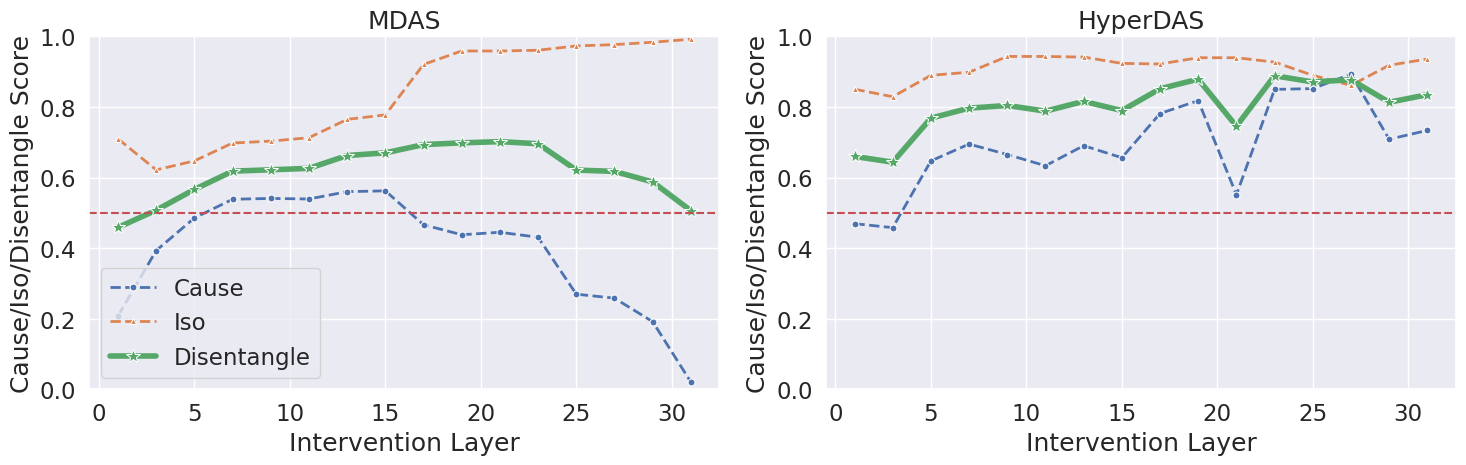

In [8]:
df# Make three line plots side by side to show the Intervention Layer vs. Cause/Iso/Disentangle Score for each inference method, use different colors for each type
# Add different markers for each type
# move the legend to the right of the last plot and remove the title of the legend
import itertools


sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

marker = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(marker) for _ in range(3)]

for i, inference_method in enumerate(["MDAS", "HyperDAS"]):
    
    for j, (type_name, marker) in enumerate(zip(["Cause", "Iso", "Disentangle"], markers)):
        style = "solid" if type_name == "Disentangle" else "dashed"
        width = 4 if type_name == "Disentangle" else 2
        marker_size = 10 if type_name == "Disentangle" else 5
        df_subset = df[(df["Inference Method"] == inference_method) & (df["Type"] == type_name)]
        sns.lineplot(x="Intervention Layer", y="Cause/Iso/Disentangle Score", data=df_subset, 
                     ax=axes[i], label=type_name, marker=marker, linestyle=style, linewidth=width, markersize=marker_size)
    axes[i].set_title(inference_method)
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel("Intervention Layer")
    axes[i].set_ylabel("Cause/Iso/Disentangle Score")
    
    # Draw a horizontal line at y=0.5 for each plot
    axes[i].axhline(y=0.5, color='r', linestyle='--')
    

# Move the legend to the up right of the last plot and remove the title of the legend
axes[0].legend(loc='lower left', title=None)

# Remove the legend in the first two plots
axes[1].get_legend().remove()
    
plt.tight_layout()

plt.savefig("layer_results_two.pdf")